📦 Data Sample:


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12.0,3.0,740.0,Credit Card,37.0,0.0,Christine Hernandez,37.0,Male,0.0
1,46251,2022-03-05 12:56:35,Home,468.0,4.0,2739.0,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
2,46251,2022-05-23 18:18:01,Home,288.0,2.0,3196.0,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
3,46251,2020-11-12 13:13:29,Clothing,196.0,1.0,3509.0,PayPal,37.0,0.0,Christine Hernandez,37.0,Male,0.0
4,13593,2020-11-27 17:55:11,Home,449.0,1.0,3452.0,Credit Card,49.0,0.0,James Grant,49.0,Female,1.0



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73420 entries, 0 to 73419
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer ID            73420 non-null  int64  
 1   Purchase Date          73420 non-null  object 
 2   Product Category       73420 non-null  object 
 3   Product Price          73419 non-null  float64
 4   Quantity               73419 non-null  float64
 5   Total Purchase Amount  73419 non-null  float64
 6   Payment Method         73419 non-null  object 
 7   Customer Age           73419 non-null  float64
 8   Returns                59416 non-null  float64
 9   Customer Name          73419 non-null  object 
 10  Age                    73419 non-null  float64
 11  Gender                 73419 non-null  object 
 12  Churn                  73419 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 7.3+ MB

🧹 Missing Values:
Customer ID  

/tmp/ipython-input-5-1480013942.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


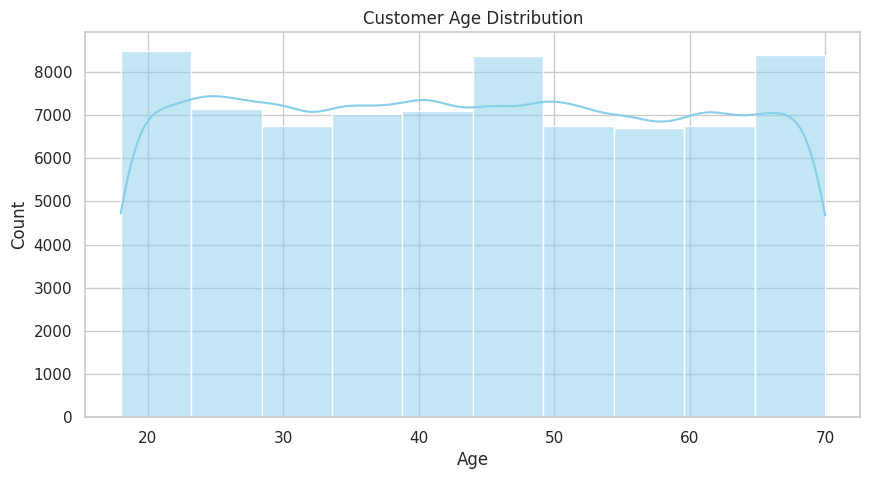

/tmp/ipython-input-5-1480013942.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total Purchase Amount', data=df, estimator=sum, palette='pastel')


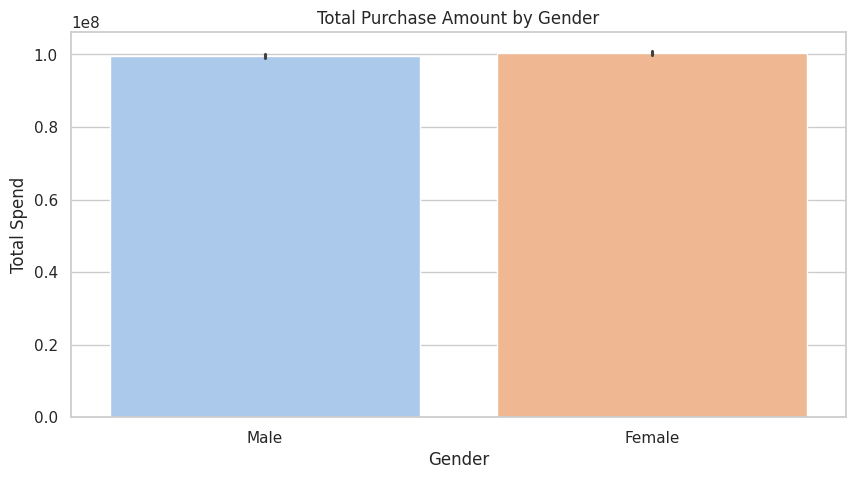

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# ---------------------------------------
# 1. Import Libraries
# ---------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# ---------------------------------------
# 2. Load the Dataset
# ---------------------------------------
# For Jupyter Notebook: Make sure the file is in the same folder
# For Google Colab: Upload it using files.upload()

# Load the CSV file
df = pd.read_csv("ecommerce_customer_data_custom_ratios.csv")

# Preview data
print("📦 Data Sample:")
display(df.head())

# ---------------------------------------
# 3. Basic Info and Data Cleaning
# ---------------------------------------
print("\n📋 Dataset Info:")
df.info()

print("\n🧹 Missing Values:")
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Example: Fill missing age or any other values (adjust based on your columns)
if 'Age' in df.columns and df['Age'].isnull().sum() > 0:
    df['Age'].fillna(df['Age'].median(), inplace=True)

# Convert date column if it exists
if 'PurchaseDate' in df.columns:
    df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
    df.dropna(subset=['PurchaseDate'], inplace=True)

# ---------------------------------------
# 4. Exploratory Data Analysis (EDA)
# ---------------------------------------

# 4.1 Age Distribution
if 'Age' in df.columns:
    sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
    plt.title("Customer Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()

# 4.2 Total Spend by Gender
if 'Gender' in df.columns and 'Total Purchase Amount' in df.columns:
    sns.barplot(x='Gender', y='Total Purchase Amount', data=df, estimator=sum, palette='pastel')
    plt.title("Total Purchase Amount by Gender")
    plt.ylabel("Total Spend")
    plt.show()

# 4.3 Top Product Categories
if 'ProductCategory' in df.columns and 'Total Purchase Amount' in df.columns:
    top_categories = df.groupby("ProductCategory")["Total Purchase Amount"].sum().sort_values(ascending=False).head(5)
    top_categories.plot(kind='bar', color='coral')
    plt.title("Top 5 Product Categories by Spend")
    plt.ylabel("Total Spend")
    plt.xticks(rotation=45)
    plt.show()

# 4.4 Monthly Revenue Trend
if 'PurchaseDate' in df.columns and 'Total Purchase Amount' in df.columns:
    monthly_revenue = df.set_index("PurchaseDate").resample('M')["Total Purchase Amount"].sum()
    monthly_revenue.plot(marker='o', linestyle='-', color='green')
    plt.title("Monthly Revenue Trend")
    plt.ylabel("Revenue")
    plt.xlabel("Month")
    plt.show()

# 4.5 Purchase Frequency by Location
if 'Location' in df.columns:
    location_frequency = df['Location'].value_counts().head(10)
    sns.barplot(x=location_frequency.index, y=location_frequency.values, palette="Set2")
    plt.title("Top 10 Locations by Number of Purchases")
    plt.ylabel("Number of Purchases")
    plt.xticks(rotation=45)
    plt.show()

# ---------------------------------------
# 5. RFM Analysis
# ---------------------------------------
if 'CustomerID' in df.columns and 'Total Purchase Amount' in df.columns and 'PurchaseDate' in df.columns:
    latest_date = df['PurchaseDate'].max()

    rfm = df.groupby('CustomerID').agg({
        'PurchaseDate': lambda x: (latest_date - x.max()).days,
        'CustomerID': 'count',
        'Total Purchase Amount': 'sum'
    }).rename(columns={
        'PurchaseDate': 'Recency',
        'CustomerID': 'Frequency',
        'Total Purchase Amount': 'Monetary'
    })

    print("\n📊 RFM Table (Sample):")
    display(rfm.head())

# ---------------------------------------
# 6. Optional: Save Outputs
# ---------------------------------------
# Save cleaned data and RFM table
df.to_csv("cleaned_ecommerce_customer_data.csv", index=False)
if 'rfm' in locals():
    rfm.to_csv("rfm_customer_analysis.csv")

from google.colab import files
files.download('cleaned_ecommerce_customer_data.csv')